In [2]:
import pandas as pd
import windrose as wr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [3]:
df_vinga = pd.read_pickle('../Dataframes/df_wind_vinga.pkl')

In [4]:
df_vinga['Year'].value_counts().tail(50)

Year
1989    2918
1990    2918
1993    2917
1987    2915
1979    2915
1986    2913
1940    2856
1997    2666
1974    2191
1939    2157
1968    1830
1964    1830
1932    1830
1928    1830
1972    1829
1973    1825
1927    1825
1963    1825
1935    1825
1934    1825
1933    1825
1931    1825
1961    1825
1962    1825
1965    1825
1967    1825
1969    1825
1970    1825
1971    1824
1929    1824
1930    1824
1966    1824
1938    1822
1926    1820
1937    1814
1936    1760
1956    1098
1960    1098
1950    1095
1955    1095
1949    1094
1958    1094
1959    1094
1954    1093
1953    1093
1951    1092
1957    1092
1952    1088
1942     501
1941      23
Name: count, dtype: int64

Enligt SMHI är mätningar från 1950, pålitliga, filtrera bort de innan

Säve-datan splittar vid 1978, splitta Vinga-datan likadant

In [5]:
df_vinga_reliable = df_vinga[df_vinga['Year'] >= 1950].reset_index().drop(columns=['index'])
df_vinga_reliable

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1950-01-01,06:00:00,270.0,Y,7.0,Y,1950,1,9.50,11.5
1,1950-01-01,12:00:00,230.0,Y,11.5,Y,1950,1,9.50,11.5
2,1950-01-01,18:00:00,230.0,Y,10.0,Y,1950,1,9.50,11.5
3,1950-01-02,06:00:00,290.0,Y,18.5,Y,1950,1,15.17,18.5
4,1950-01-02,12:00:00,280.0,Y,15.5,Y,1950,1,15.17,18.5
...,...,...,...,...,...,...,...,...,...,...
245518,2023-07-01,02:00:00,248.0,G,6.1,G,2023,7,6.96,8.1
245519,2023-07-01,03:00:00,230.0,G,7.7,G,2023,7,6.96,8.1
245520,2023-07-01,04:00:00,224.0,G,7.0,G,2023,7,6.96,8.1
245521,2023-07-01,05:00:00,209.0,G,7.0,G,2023,7,6.96,8.1


In [6]:
df_vinga_pre_1978 = df_vinga_reliable[df_vinga_reliable['Year'] < 1978].reset_index().drop(columns=['index']) 
df_vinga_post_1978 = df_vinga_reliable[df_vinga_reliable['Year'] >= 1978].reset_index().drop(columns=['index']) 

In [7]:
df_vinga_pre_1978

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1950-01-01,06:00:00,270.0,Y,7.0,Y,1950,1,9.50,11.5
1,1950-01-01,12:00:00,230.0,Y,11.5,Y,1950,1,9.50,11.5
2,1950-01-01,18:00:00,230.0,Y,10.0,Y,1950,1,9.50,11.5
3,1950-01-02,06:00:00,290.0,Y,18.5,Y,1950,1,15.17,18.5
4,1950-01-02,12:00:00,280.0,Y,15.5,Y,1950,1,15.17,18.5
...,...,...,...,...,...,...,...,...,...,...
46721,1977-12-31,09:00:00,20.0,G,14.0,G,1977,12,9.00,15.0
46722,1977-12-31,12:00:00,360.0,G,8.0,G,1977,12,9.00,15.0
46723,1977-12-31,15:00:00,360.0,G,7.0,G,1977,12,9.00,15.0
46724,1977-12-31,18:00:00,360.0,G,2.0,G,1977,12,9.00,15.0


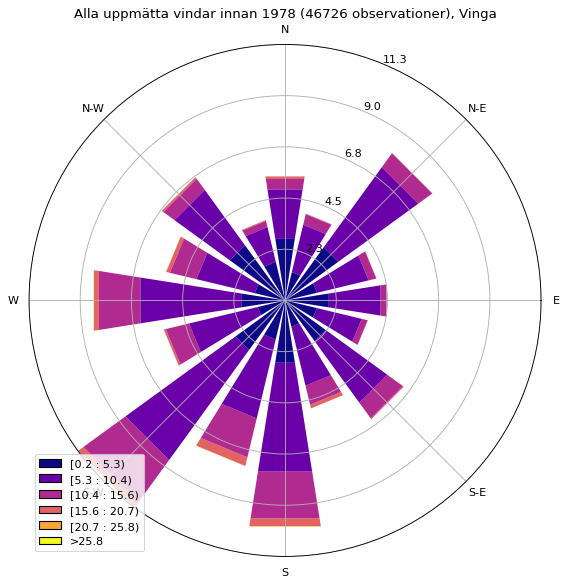

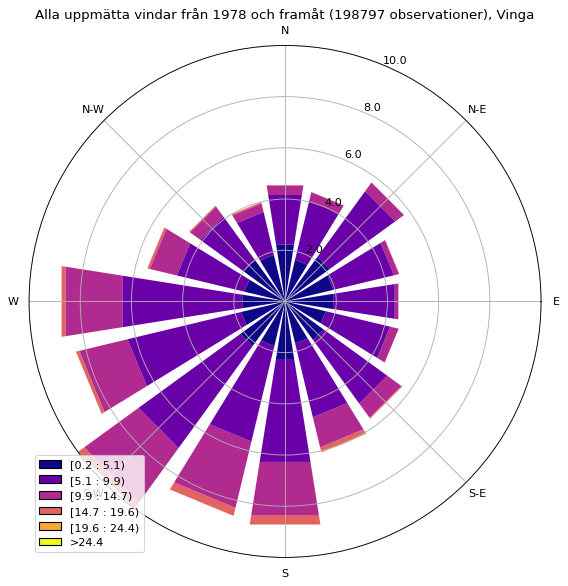

In [8]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1978['Vindriktning'], df_vinga_pre_1978['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Alla uppmätta vindar innan 1978 ({len(df_vinga_pre_1978)} observationer), Vinga')
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1978['Vindriktning'], df_vinga_post_1978['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Alla uppmätta vindar från 1978 och framåt ({len(df_vinga_post_1978)} observationer), Vinga')
ax.legend()
plt.show()

Är skillnaderna för att det som i göteborgsfallet räknades färre riktningar innan 1960?
<p>Answer: Nope

In [9]:
df_vinga_pre_1960 = df_vinga[df_vinga['Year'] < 1961].reset_index().drop(columns=['index'])

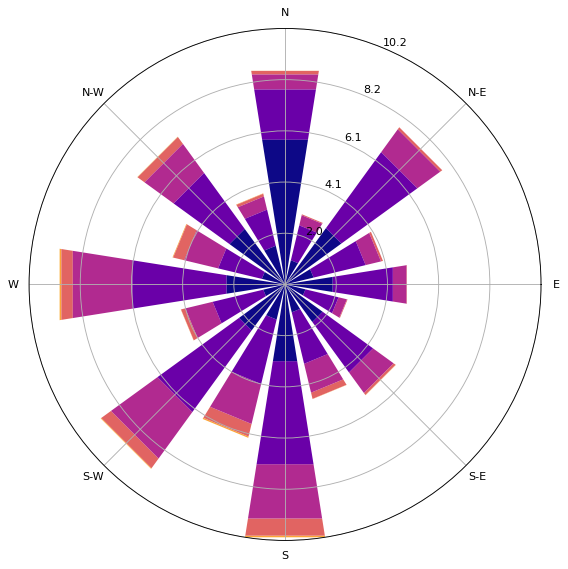

In [10]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1960['Vindriktning'], df_vinga_pre_1960['Snitt_per_dag'], normed=True, cmap=cm.plasma)

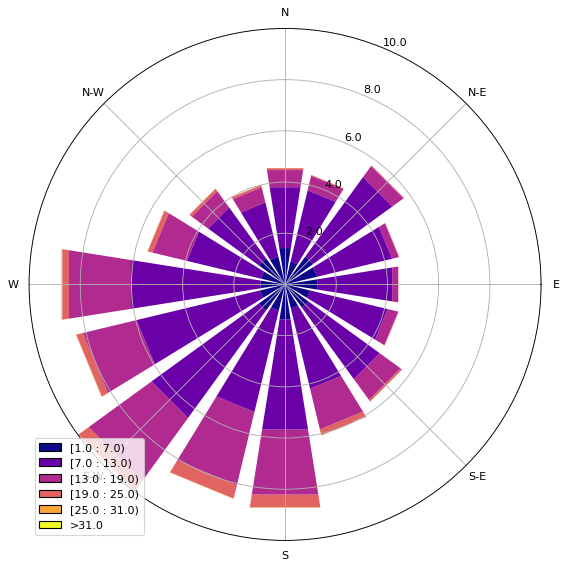

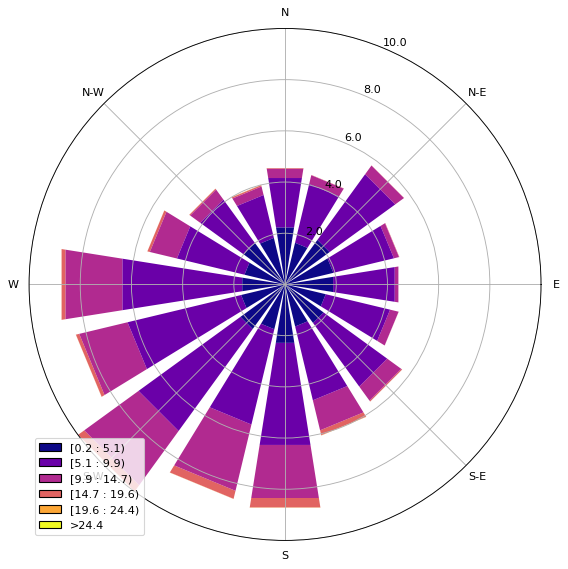

In [11]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1978['Vindriktning'], df_vinga_post_1978['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1978['Vindriktning'], df_vinga_post_1978['Snitt_per_dag'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

Can older meassurements explain the shorter NNE/NNW etc arms in the first figure?

In [12]:
df_vinga_pre_1960 = df_vinga[df_vinga['Year'] < 1960].reset_index().drop(columns=['index'])
df_vinga_post_1960 = df_vinga[df_vinga['Year'] >= 1960].reset_index().drop(columns=['index'])

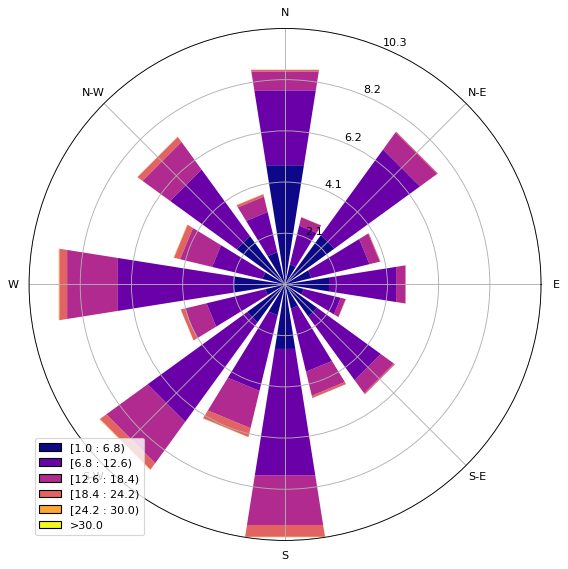

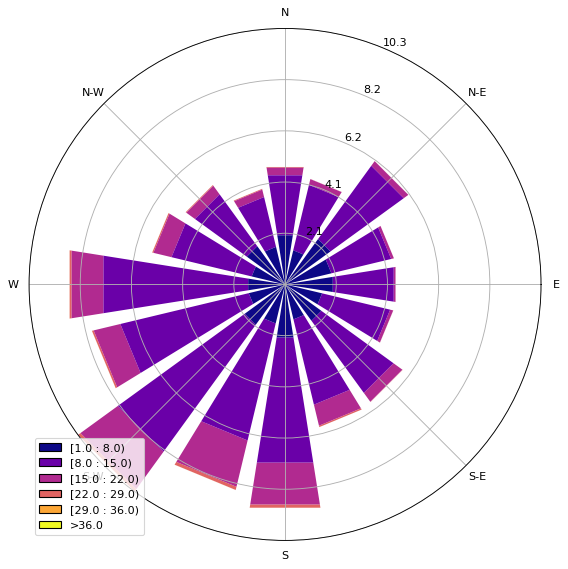

In [13]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1960['Vindriktning'], df_vinga_pre_1960['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1960['Vindriktning'], df_vinga_post_1960['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

Bar ahård vind och uppåt

In [14]:
df_vinga_hard = df_vinga[df_vinga['Max_uppmätta_hastighet'] >= 13.9].reset_index().drop(columns=['index'])
df_vinga_hard_pre_1978 = df_vinga_hard[df_vinga_hard['Year'] < 1978].reset_index().drop(columns=['index'])
df_vinga_hard_post_1978 = df_vinga_hard[df_vinga_hard['Year'] >= 1978].reset_index().drop(columns=['index'])

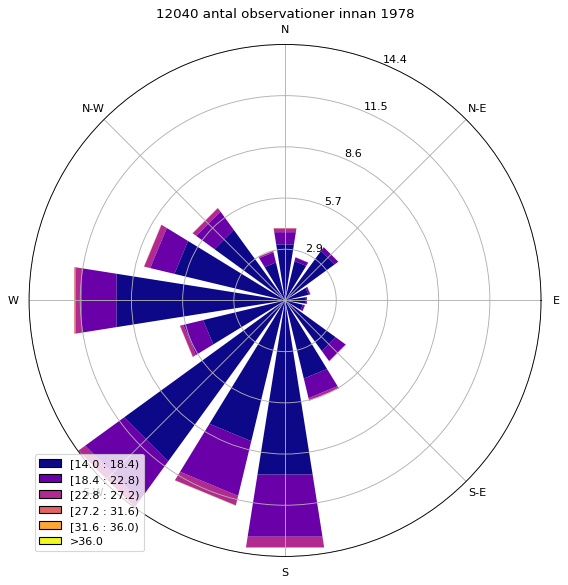

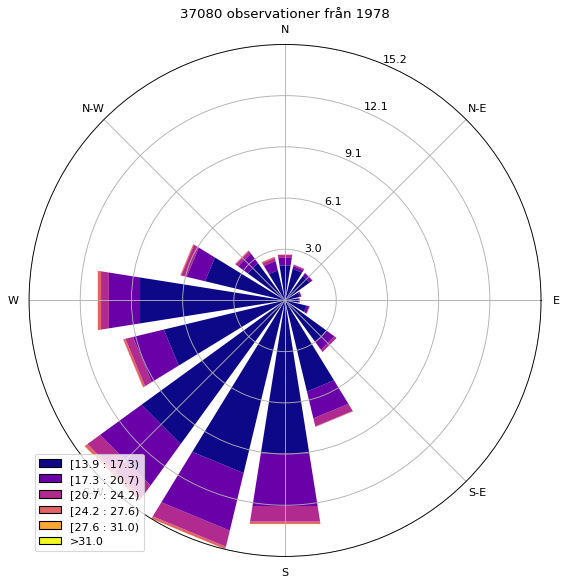

In [15]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_hard_pre_1978['Vindriktning'], df_vinga_hard_pre_1978['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
plt.title(f'{len(df_vinga_hard_pre_1978)} antal observationer innan 1978')
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_hard_post_1978['Vindriktning'], df_vinga_hard_post_1978['Max_uppmätta_hastighet'], normed=True, cmap=cm.plasma)
plt.title(f'{len(df_vinga_hard_post_1978)} observationer från 1978')
ax.legend()
plt.show()

In [16]:
kat_7_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 13.9])
kat_8_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 17.2])
kat_9_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 20.8])
kat_10_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 25.5])
kat_11_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 28.5])
kat_12_vinga_pre_1978 = len(df_vinga_pre_1978[df_vinga_pre_1978['Max_uppmätta_hastighet'] >= 32.7])

intensity_pre_1978_vinga = [kat_7_vinga_pre_1978, kat_8_vinga_pre_1978, kat_9_vinga_pre_1978, kat_10_vinga_pre_1978, kat_11_vinga_pre_1978, kat_12_vinga_pre_1978]

kat_7_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 13.9])
kat_8_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 17.2])
kat_9_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 20.8])
kat_10_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 25.5])
kat_11_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 28.5])
kat_12_vinga_post_1978 = len(df_vinga_post_1978[df_vinga_post_1978['Max_uppmätta_hastighet'] >= 32.7])

intensity_post_1978_vinga = [kat_7_vinga_post_1978, kat_8_vinga_post_1978, kat_9_vinga_post_1978, kat_10_vinga_post_1978, kat_11_vinga_post_1978, kat_12_vinga_post_1978]

In [17]:
df_hard_wind_vinga = pd.DataFrame({'Categories': ['>13.9 m/s', '>17.2 m/s', '>20.8 m/s', '>25.5 m/s', '>28.5 m/s', '>32.7 m/s'], 
                                   'Values_pre_1978': intensity_pre_1978_vinga, 'Values_post_1978': intensity_post_1978_vinga})


In [18]:
df_hard_wind_vinga

,Categories,Values_pre_1978,Values_post_1978
0,>13.9 m/s,7017,37080
1,>17.2 m/s,2401,10270
2,>20.8 m/s,645,2524
3,>25.5 m/s,59,160
4,>28.5 m/s,18,32
5,>32.7 m/s,8,0


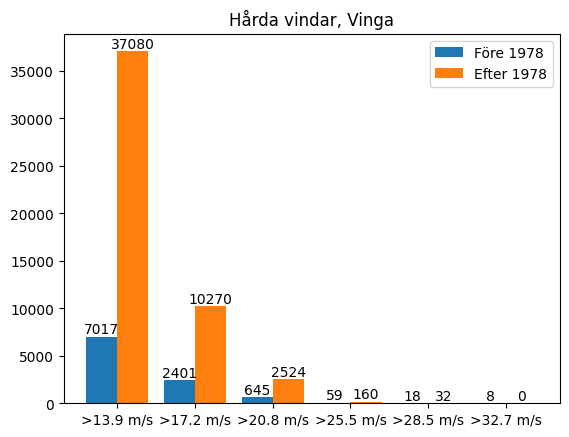

In [19]:
x = df_hard_wind_vinga['Categories']
width = 0.4
x_vals = range(len(x))
x_vals
x_vals_2 = [x + width for x in x_vals]

plt.bar(x_vals, df_hard_wind_vinga['Values_pre_1978'], width=width, align='center', label='Före 1978')
plt.bar(x_vals_2, df_hard_wind_vinga['Values_post_1978'], width=width, align='center', label='Efter 1978')
plt.title('Hårda vindar, Vinga')
plt.xticks([x + width / 2 for x in x_vals], x)
for i, x in enumerate(df_hard_wind_vinga['Values_pre_1978']):
    plt.text(x_vals[i], x + 1, str(x), ha='center', va='bottom')
for i, x in enumerate(df_hard_wind_vinga['Values_post_1978']):
    plt.text(x_vals_2[i], x + 1, str(x), ha='center', va='bottom')
plt.legend()

Begränsa till och med 2006, där Säve slutade (alltså: kolla samma tidsperiod)

In [20]:
df_vinga_hard_winds_1978_2006 = df_vinga_hard_post_1978[df_vinga_hard_post_1978['Year'] < 2007].reset_index().drop(columns=['index'])


In [21]:
df_vinga_hard_winds_1978_2006

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1978-01-01,00:00:00,160.0,G,7.0,G,1978,1,12.75,17.0
1,1978-01-01,03:00:00,250.0,G,7.0,G,1978,1,12.75,17.0
2,1978-01-01,06:00:00,230.0,G,10.0,G,1978,1,12.75,17.0
3,1978-01-01,09:00:00,230.0,G,16.0,G,1978,1,12.75,17.0
4,1978-01-01,12:00:00,230.0,G,16.0,G,1978,1,12.75,17.0
...,...,...,...,...,...,...,...,...,...,...
13106,1997-11-15,09:00:00,140.0,G,11.0,G,1997,11,9.75,14.0
13107,1997-11-15,12:00:00,130.0,G,9.0,G,1997,11,9.75,14.0
13108,1997-11-15,15:00:00,130.0,G,8.0,G,1997,11,9.75,14.0
13109,1997-11-15,18:00:00,120.0,G,7.0,G,1997,11,9.75,14.0


In [22]:


kat_7_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 13.9])
kat_8_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 17.2])
kat_9_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 20.8])
kat_10_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 25.5])
kat_11_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 28.5])
kat_12_vinga_1978_2006 = len(df_vinga_hard_winds_1978_2006[df_vinga_hard_winds_1978_2006['Max_uppmätta_hastighet'] >= 32.7])

intensity_1978_2006_vinga = [kat_7_vinga_1978_2006, kat_8_vinga_1978_2006, kat_9_vinga_1978_2006, kat_10_vinga_1978_2006, kat_11_vinga_1978_2006, kat_12_vinga_1978_2006]



In [23]:
df_hard_wind_vinga_lim = pd.DataFrame({'Categories': ['>13.9 m/s', '>17.2 m/s', '>20.8 m/s', '>25.5 m/s', '>28.5 m/s', '>32.7 m/s'], 
                                   'Values_pre_1978': intensity_pre_1978_vinga, 'Values_1978_2006': intensity_1978_2006_vinga})


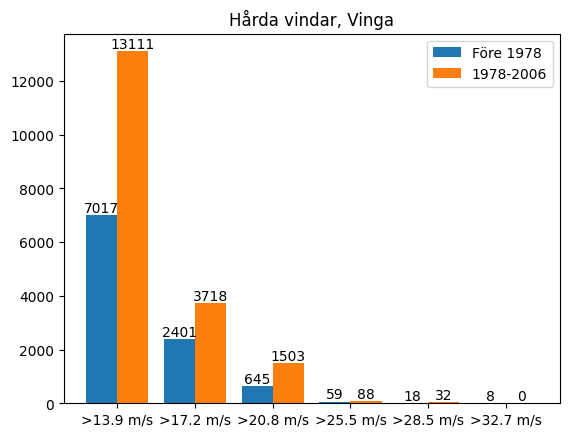

In [24]:
x = df_hard_wind_vinga_lim['Categories']
width = 0.4
x_vals = range(len(x))
x_vals
x_vals_2 = [x + width for x in x_vals]

plt.bar(x_vals, df_hard_wind_vinga_lim['Values_pre_1978'], width=width, align='center', label='Före 1978')
plt.bar(x_vals_2, df_hard_wind_vinga_lim['Values_1978_2006'], width=width, align='center', label='1978-2006')
plt.title('Hårda vindar, Vinga')
plt.xticks([x + width / 2 for x in x_vals], x)
for i, x in enumerate(df_hard_wind_vinga_lim['Values_pre_1978']):
    plt.text(x_vals[i], x + 1, str(x), ha='center', va='bottom')
for i, x in enumerate(df_hard_wind_vinga_lim['Values_1978_2006']):
    plt.text(x_vals_2[i], x + 1, str(x), ha='center', va='bottom')
plt.legend()
plt.show()

Kolla närmare på de riktigt kraftiga vindarna

In [25]:
storm_vinga_pre_1990 = intensity_pre_1990_vinga[3:]
storm_vinga_post_1990 = intensity_post_1990_vinga[3:]

NameError: name 'intensity_pre_1990_vinga' is not defined

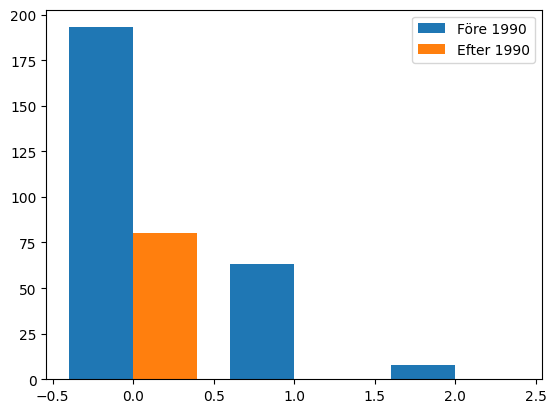

In [ ]:
x = np.arange(3)
plt.bar(x - 0.4/2, storm_vinga_pre_1990, width=0.4)
plt.bar(x + 0.4/2, storm_vinga_post_1990, width=0.4)
plt.legend(df_hard_wind_vinga_wide['Tid'])
plt.show()


Gör vinga-plot som korrelerar med bygg-datan 1975-2006


In [28]:
df_vinga_pre_1990 = df_vinga_reliable[df_vinga_reliable['Year'] < 1990].reset_index().drop(columns=['index']) 
df_vinga_post_1990 = df_vinga_reliable[df_vinga_reliable['Year'] >= 1990].reset_index().drop(columns=['index']) 
df_vinga_post_1990 = df_vinga_post_1990[df_vinga_post_1990['Year'] < 2007].reset_index().drop(columns=['index']) 

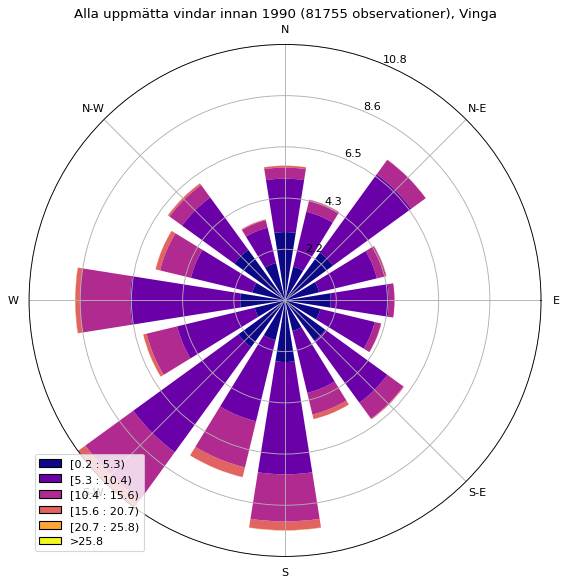

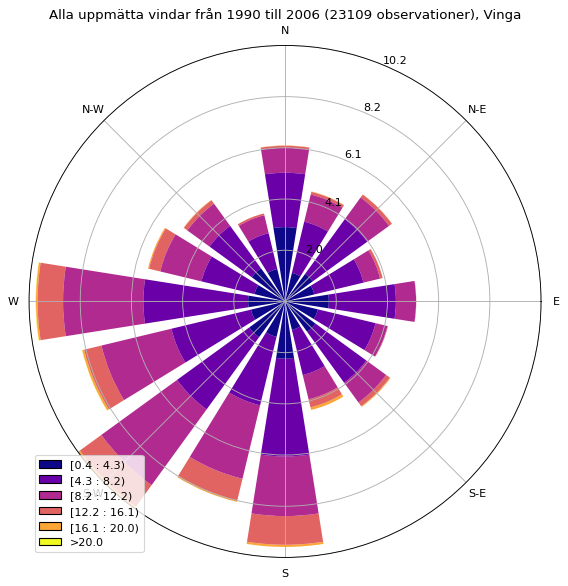

In [30]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_pre_1990['Vindriktning'], df_vinga_pre_1990['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Alla uppmätta vindar innan 1990 ({len(df_vinga_pre_1990)} observationer), Vinga')
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_vinga_post_1990['Vindriktning'], df_vinga_post_1990['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Alla uppmätta vindar från 1990 till 2006 ({len(df_vinga_post_1990)} observationer), Vinga')
ax.legend()
plt.show()